In [27]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [28]:
#starting some initial exploration

#read in CSV
hr_df = pd.read_csv("./hr_stats.csv")

#review DF
hr_df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


In [29]:
#find out what is in the columns

print(hr_df.info())

print(hr_df.describe())

print(hr_df.describe(include = ['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

Summary:
* 200 total entries, each line is a unique employee
* 5 departments
* 6 positions



In [30]:
# dropping columns to make more usable 

hr_df.drop(hr_df.columns[[1,5,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,33,39,40,41,42,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]], axis=1, inplace=True)

In [31]:
le = LabelEncoder()
hr_df['gender_binary'] = le.fit_transform(hr_df['Gender'])
hr_df['dept_no'] = le.fit_transform(hr_df['Department'])
hr_df['position_no'] = le.fit_transform(hr_df['Role'])

hr_df.head()

hr_df.to_csv('cleaned_hr.csv')

In [32]:
ML_df = hr_df.drop(columns=["Gender", "Department", "Role", "ID", "gender_binary"])
ML_df.dtypes

GEO                       object
Will_Relocate              int64
Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
sales                     object
salary                    object
LinkedIn_Hits              int64
Emp_Identity               int64
Emp_Role                   int64
Emp_Position               int64
Emp_Title                  int64
dept_no                    int64
position_no                int64
dtype: object

In [33]:
ML_df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [34]:
dummies_df = pd.get_dummies(ML_df)
# dummies_df = dummies_df.drop(columns=["GEO", "sales", "salary"])
dummies_df.dtypes

Will_Relocate              int64
Percent_Remote           float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left_Company               int64
promotion_last_5years      int64
LinkedIn_Hits              int64
Emp_Identity               int64
Emp_Role                   int64
Emp_Position               int64
Emp_Title                  int64
dept_no                    int64
position_no                int64
GEO_Australia              uint8
GEO_China                  uint8
GEO_Colombia               uint8
GEO_France                 uint8
GEO_Japan                  uint8
GEO_Korea                  uint8
GEO_Turkey                 uint8
GEO_UK                     uint8
GEO_US                     uint8
sales_IT                   uint8
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_mark

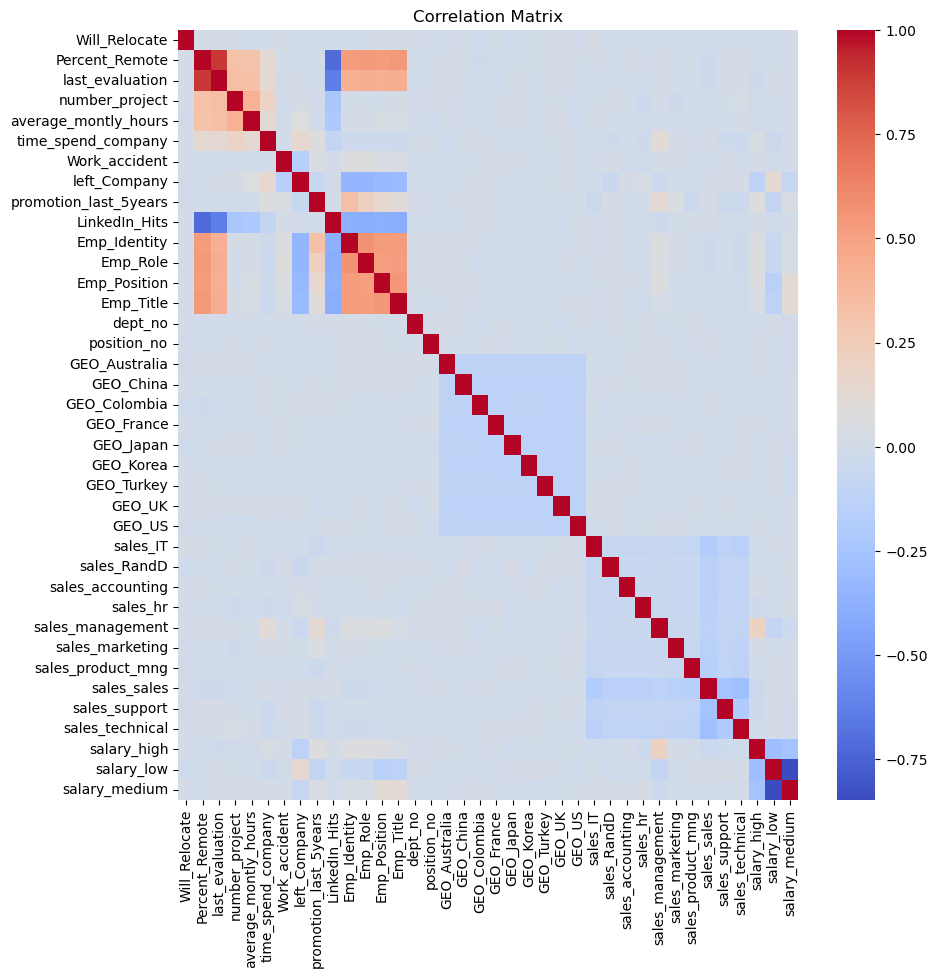

In [35]:
#correlation heatmap

# Correlation matrix
corr = dummies_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr,  cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
X = dummies_df.drop(columns=["left_Company"])
y = dummies_df["left_Company"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
y.value_counts()

0    11428
1     3571
Name: left_Company, dtype: int64

In [38]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_prediction = rf.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_test, y_prediction))

[[2859    9]
 [  32  850]]


In [42]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2868
           1       0.99      0.96      0.98       882

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



In [43]:
rf.feature_importances_

array([0.00237353, 0.04747294, 0.13134267, 0.20648038, 0.14543351,
       0.11846161, 0.00969862, 0.00062095, 0.04034715, 0.07420332,
       0.06742499, 0.05355097, 0.04974559, 0.00666782, 0.00669849,
       0.00121102, 0.00151875, 0.00149303, 0.00127092, 0.00145253,
       0.0012653 , 0.00161824, 0.00145318, 0.00174198, 0.00131763,
       0.00117912, 0.00124129, 0.0015709 , 0.00073508, 0.0007653 ,
       0.00082254, 0.00217872, 0.00198223, 0.00252866, 0.00432625,
       0.00510587, 0.00269894])

In [54]:
importance_df = pd.DataFrame({"columns": X_train.columns, "importance": rf.feature_importances_*100}).sort_values(by="importance", ascending=False)

importance_df

,columns,importance
3,number_project,20.648038
4,average_montly_hours,14.543351
2,last_evaluation,13.134267
5,time_spend_company,11.846161
9,Emp_Identity,7.420332
10,Emp_Role,6.742499
11,Emp_Position,5.355097
12,Emp_Title,4.974559
1,Percent_Remote,4.747294
8,LinkedIn_Hits,4.034715


In [55]:
#save importances as csv to use in Tableau
importance_df.to_csv('importances.csv')

In [45]:
# Split the data into X and y and then into testing and training sets
X = dummies_df.drop(columns=["left_Company"])
y = dummies_df["left_Company"]
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [46]:
random_over_sampler = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = random_over_sampler.fit_resample(X_train, y_train)

In [47]:
scaler = StandardScaler()
scaler.fit(X_train_ros)
X_train_ros_scaled = scaler.transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Fit a logistic regression classifier
# Declare a logistic regression model
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train_ros_scaled, y_train_ros)

In [49]:
# Generate training predictions
training_predictions = lr_model.predict(X_train_ros_scaled)

# Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test_scaled)

In [50]:
# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train_ros, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[6912 1669]
 [1410 7171]]


In [51]:
# Create and save the confusion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[2303  544]
 [ 154  749]]


In [52]:
# Create and save the training classification report
training_report = classification_report(y_train_ros, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8581
           1       0.81      0.84      0.82      8581

    accuracy                           0.82     17162
   macro avg       0.82      0.82      0.82     17162
weighted avg       0.82      0.82      0.82     17162



In [53]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2847
           1       0.58      0.83      0.68       903

    accuracy                           0.81      3750
   macro avg       0.76      0.82      0.78      3750
weighted avg       0.85      0.81      0.82      3750

